## Plan

### 1. Forståelse av Data:
####   Forstå strukturen og forholdene mellom arkene: Medlemmer, Kontingent og Betalinger.
####   Identifiser aldersgrupper og medlemstyper basert på Fødselsdato og Aldersgruppe i Kontingent-arket.

### 2. Definer Mål:
####   Verifiser og oppdater medlemstype basert på alder.
####   Matche betalinger med riktig kontingentsats og flagg eventuelle avvik.
####   Lever en rapport som inkluderer:
####    Medlemsdetaljer.
####    Betalingsdetaljer.
####    Avvik (om noen).

### 3. Datapreparering:
####   Håndter manglende, feilaktige eller dupliserte data.

## 1. Extrakt

In [1]:
# Import biblioteker

import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Last excel data

file_vei = r'Datagrunnlag.xlsx'

medlemmer = pd.read_excel(file_vei, sheet_name='Medlemmer')
kontingent = pd.read_excel(file_vei, sheet_name='Kontingent')
betalinger = pd.read_excel(file_vei, sheet_name='Betalinger')

In [3]:
# Sjekker at hvor mange data har NaN valuer

nan_rows = medlemmer[medlemmer.isnull().any(axis=1)]

nan_rows

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed
98,90,Marie,NaN,12.08.1964,F,senior,Myrvangveien,6601,NaN


## 2. Transform (Forvandle)

In [4]:
# Regne alder og bestemmer riktig medlemmer type

år = 2017
medlemmer['Alder'] = år - pd.to_datetime(medlemmer['Fødselsdato'], errors='coerce').dt.year

C:\Users\sivasa\AppData\Local\Temp\ipykernel_14256\2466693430.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  medlemmer['Alder'] = år - pd.to_datetime(medlemmer['Fødselsdato'], errors='coerce').dt.year


In [5]:
def bestemme_medlemstype(alder):
    if 10 <= alder <= 17:
        return 'Junior'
    elif 18 <= alder <= 60:
        return 'Senior'
    elif alder > 60:
        return 'Veteran'
    else:
        return 'Uvitende'

medlemmer['Riktig_Medlemstype'] = medlemmer['Alder'].apply(bestemme_medlemstype)

medlemmer

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Alder,Riktig_Medlemstype
0,62,Sahra,AAS,28.03.1957,F,Veteran,Nytrøa,6166,Sæbø,60.0,Senior
1,87,Hanne,AASEN,22.05.1964,F,Senior,Krokveien,6399,Vestnes,53.0,Senior
2,99,Solveig,ABRAHAMSEN,08.05.1968,F,Senior,Langsæterlia,6687,Valsøyfjorden,49.0,Senior
3,71,Karen,AHMED,23.07.1960,F,Veteran,Rødalsveien,6239,Sykkylven,57.0,Senior
4,52,Emma,ALI,05.11.1951,F,Veteran,Sottdalen,6051,Valderøy,66.0,Veteran
...,...,...,...,...,...,...,...,...,...,...,...
94,66,Maya,THOMASSEN,11.01.1958,F,senior,Sørsjølia,6210,Sylte,59.0,Senior
95,81,Susanne,THORSEN,24.05.2005,F,junior,Klettvangveien,6310,Veblungsnes,12.0,Junior
96,97,Anne,TVEIT,30.01.1968,F,senior,Skibakkveien,6683,Vågland,49.0,Senior
97,78,Åse,VIK,25.06.1962,F,senior,Svartberget,6280,Søvik,55.0,Senior


In [6]:
manglende_medlemstype = medlemmer[medlemmer['Riktig_Medlemstype'] == 'Uvitende']

manglende_medlemstype

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Alder,Riktig_Medlemstype
12,48,Magnus,BAKKE,22.06.2049,M,veteran,Skåret,6686,Valsøybotn,-32.0,Uvitende
50,2,Johan,JOHANSEN,14.14.1908,M,veteran,Børliveien,6051,Valderøy,NaN,Uvitende


In [7]:
# Filter out rows where Medlemsnummer is 2 and 48

#members = members[~members['Medlemsnummer'].isin([2, 48])]

medlemmer['Kategori'] = medlemmer['Riktig_Medlemstype'].apply(lambda x: 'mangler alder' if x == 'Uvitende' else 'Riktig')

In [8]:
medlemmer = medlemmer.drop('Medlemstype', axis = 1)

In [9]:
medlemmer = medlemmer.rename(columns={'Riktig_Medlemstype': 'Medlemstype'})

medlemmer

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Gateadresse,Postnummer,Poststed,Alder,Medlemstype,Kategori
0,62,Sahra,AAS,28.03.1957,F,Nytrøa,6166,Sæbø,60.0,Senior,Riktig
1,87,Hanne,AASEN,22.05.1964,F,Krokveien,6399,Vestnes,53.0,Senior,Riktig
2,99,Solveig,ABRAHAMSEN,08.05.1968,F,Langsæterlia,6687,Valsøyfjorden,49.0,Senior,Riktig
3,71,Karen,AHMED,23.07.1960,F,Rødalsveien,6239,Sykkylven,57.0,Senior,Riktig
4,52,Emma,ALI,05.11.1951,F,Sottdalen,6051,Valderøy,66.0,Veteran,Riktig
...,...,...,...,...,...,...,...,...,...,...,...
94,66,Maya,THOMASSEN,11.01.1958,F,Sørsjølia,6210,Sylte,59.0,Senior,Riktig
95,81,Susanne,THORSEN,24.05.2005,F,Klettvangveien,6310,Veblungsnes,12.0,Junior,Riktig
96,97,Anne,TVEIT,30.01.1968,F,Skibakkveien,6683,Vågland,49.0,Senior,Riktig
97,78,Åse,VIK,25.06.1962,F,Svartberget,6280,Søvik,55.0,Senior,Riktig


In [10]:
betalinger

,Medlemsnummer,Beløp,Periode,Innbetalt_dato
0,62,750,2017,2017-05-14
1,87,900,2017,2017-05-18
2,99,900,2017,2017-06-30
3,71,750,2017,2017-05-03
4,52,900,2017,2017-05-14
...,...,...,...,...
80,42,900,2017,2017-05-03
81,85,750,2017,2017-05-14
82,72,400,2017,2017-05-18
83,73,900,2017,2017-06-30


In [11]:
dupliserte_medlemmer = medlemmer[medlemmer.duplicated(subset='Medlemsnummer', keep=False)]

dupliserte_medlemmer

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Gateadresse,Postnummer,Poststed,Alder,Medlemstype,Kategori
52,42,Stein,JØRGENSEN,19.12.1934,M,Vollanveien,6239,Sykkylven,83.0,Veteran,Riktig
59,42,Ludvig,LARSEN,08.02.1908,M,Frendstadgjelen,6065,Ulsteinvik,109.0,Veteran,Riktig
80,42,Hansd,RASMUSSEN,19.02.1947,M,Støa,6639,Torvikbukt,70.0,Veteran,Riktig
86,42,Karl,SOLBERG,10.09.1941,M,Storinnsjøveien,6390,Vestnes,76.0,Veteran,Riktig


In [12]:
dupliserte_betalinger = betalinger[betalinger.duplicated(subset='Medlemsnummer', keep=False)]

dupliserte_betalinger

,Medlemsnummer,Beløp,Periode,Innbetalt_dato
52,42,750,2017,2017-05-14
59,42,750,2017,2017-05-03
80,42,900,2017,2017-05-03


In [13]:
# Filter out rows where Medlemsnummer is 42 in both tables

#members = members[members['Medlemsnummer'] != 42]
betalinger = betalinger[betalinger['Medlemsnummer'] != 42]

medlemmer.loc[medlemmer['Medlemsnummer'].duplicated(keep=False), 'Kategori'] = 'duplisert'

In [14]:
#rows_with_42_in_members = members[members['Medlemsnummer'] == 42]

#rows_with_42_in_members

In [15]:
# Merge and validate payments

med_betal_data = pd.merge(medlemmer, betalinger, on='Medlemsnummer', how='left', indicator=True)

med_betal_data

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Gateadresse,Postnummer,Poststed,Alder,Medlemstype,Kategori,Beløp,Periode,Innbetalt_dato,_merge
0,62,Sahra,AAS,28.03.1957,F,Nytrøa,6166,Sæbø,60.0,Senior,Riktig,750.0,2017.0,2017-05-14,both
1,87,Hanne,AASEN,22.05.1964,F,Krokveien,6399,Vestnes,53.0,Senior,Riktig,900.0,2017.0,2017-05-18,both
2,99,Solveig,ABRAHAMSEN,08.05.1968,F,Langsæterlia,6687,Valsøyfjorden,49.0,Senior,Riktig,900.0,2017.0,2017-06-30,both
3,71,Karen,AHMED,23.07.1960,F,Rødalsveien,6239,Sykkylven,57.0,Senior,Riktig,750.0,2017.0,2017-05-03,both
4,52,Emma,ALI,05.11.1951,F,Sottdalen,6051,Valderøy,66.0,Veteran,Riktig,900.0,2017.0,2017-05-14,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,66,Maya,THOMASSEN,11.01.1958,F,Sørsjølia,6210,Sylte,59.0,Senior,Riktig,NaN,NaN,NaT,left_only
95,81,Susanne,THORSEN,24.05.2005,F,Klettvangveien,6310,Veblungsnes,12.0,Junior,Riktig,NaN,NaN,NaT,left_only
96,97,Anne,TVEIT,30.01.1968,F,Skibakkveien,6683,Vågland,49.0,Senior,Riktig,NaN,NaN,NaT,left_only
97,78,Åse,VIK,25.06.1962,F,Svartberget,6280,Søvik,55.0,Senior,Riktig,NaN,NaN,NaT,left_only


In [16]:
med_betal_data['Kategori'] = med_betal_data.apply(
    lambda row: 'Ingen_betalingsdetaljer' if row['_merge'] != 'both' and row['Kategori'] == 'Riktig' else row['Kategori'],
    axis=1
)

In [17]:
med_betal_data = med_betal_data.drop('_merge', axis=1)

med_betal_data

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Gateadresse,Postnummer,Poststed,Alder,Medlemstype,Kategori,Beløp,Periode,Innbetalt_dato
0,62,Sahra,AAS,28.03.1957,F,Nytrøa,6166,Sæbø,60.0,Senior,Riktig,750.0,2017.0,2017-05-14
1,87,Hanne,AASEN,22.05.1964,F,Krokveien,6399,Vestnes,53.0,Senior,Riktig,900.0,2017.0,2017-05-18
2,99,Solveig,ABRAHAMSEN,08.05.1968,F,Langsæterlia,6687,Valsøyfjorden,49.0,Senior,Riktig,900.0,2017.0,2017-06-30
3,71,Karen,AHMED,23.07.1960,F,Rødalsveien,6239,Sykkylven,57.0,Senior,Riktig,750.0,2017.0,2017-05-03
4,52,Emma,ALI,05.11.1951,F,Sottdalen,6051,Valderøy,66.0,Veteran,Riktig,900.0,2017.0,2017-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,66,Maya,THOMASSEN,11.01.1958,F,Sørsjølia,6210,Sylte,59.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaT
95,81,Susanne,THORSEN,24.05.2005,F,Klettvangveien,6310,Veblungsnes,12.0,Junior,Ingen_betalingsdetaljer,NaN,NaN,NaT
96,97,Anne,TVEIT,30.01.1968,F,Skibakkveien,6683,Vågland,49.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaT
97,78,Åse,VIK,25.06.1962,F,Svartberget,6280,Søvik,55.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaT


In [18]:
kontingent

,Medlemstype,Kontingent,Periode,Aldersgruppe
0,Senior,900,2017,18-60
1,Junior,400,2017,10-17
2,Veteran,750,2017,60 +
3,Senior,850,2016,18-60
4,Junior,350,2016,10-17
5,Veteran,700,2016,60 +


In [19]:
med_betal_data.columns = med_betal_data.columns.str.strip()

kontingent.columns = kontingent.columns.str.strip()

In [20]:
med_betal_data['Medlemstype'] = med_betal_data['Medlemstype'].str.strip().str.title()  # remove spaces and standardize capitalization

kontingent['Medlemstype'] = kontingent['Medlemstype'].str.strip().str.title()

In [21]:
blandet_data = med_betal_data.merge(kontingent, left_on=['Medlemstype', 'Periode'], right_on=['Medlemstype', 'Periode'], how='left')

In [22]:
blandet_data

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Gateadresse,Postnummer,Poststed,Alder,Medlemstype,Kategori,Beløp,Periode,Innbetalt_dato,Kontingent,Aldersgruppe
0,62,Sahra,AAS,28.03.1957,F,Nytrøa,6166,Sæbø,60.0,Senior,Riktig,750.0,2017.0,2017-05-14,900.0,18-60
1,87,Hanne,AASEN,22.05.1964,F,Krokveien,6399,Vestnes,53.0,Senior,Riktig,900.0,2017.0,2017-05-18,900.0,18-60
2,99,Solveig,ABRAHAMSEN,08.05.1968,F,Langsæterlia,6687,Valsøyfjorden,49.0,Senior,Riktig,900.0,2017.0,2017-06-30,900.0,18-60
3,71,Karen,AHMED,23.07.1960,F,Rødalsveien,6239,Sykkylven,57.0,Senior,Riktig,750.0,2017.0,2017-05-03,900.0,18-60
4,52,Emma,ALI,05.11.1951,F,Sottdalen,6051,Valderøy,66.0,Veteran,Riktig,900.0,2017.0,2017-05-14,750.0,60 +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,66,Maya,THOMASSEN,11.01.1958,F,Sørsjølia,6210,Sylte,59.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaT,NaN,NaN
95,81,Susanne,THORSEN,24.05.2005,F,Klettvangveien,6310,Veblungsnes,12.0,Junior,Ingen_betalingsdetaljer,NaN,NaN,NaT,NaN,NaN
96,97,Anne,TVEIT,30.01.1968,F,Skibakkveien,6683,Vågland,49.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaT,NaN,NaN
97,78,Åse,VIK,25.06.1962,F,Svartberget,6280,Søvik,55.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaT,NaN,NaN


In [23]:
nan_rows = blandet_data[blandet_data.isnull().any(axis=1)]

nan_rows

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Gateadresse,Postnummer,Poststed,Alder,Medlemstype,Kategori,Beløp,Periode,Innbetalt_dato,Kontingent,Aldersgruppe
12,48,Magnus,BAKKE,22.06.2049,M,Skåret,6686,Valsøybotn,-32.0,Uvitende,mangler alder,750.0,2017.0,2017-05-14,NaN,NaN
50,2,Johan,JOHANSEN,14.14.1908,M,Børliveien,6051,Valderøy,NaN,Uvitende,mangler alder,750.0,2017.0,2017-06-30,NaN,NaN
52,42,Stein,JØRGENSEN,19.12.1934,M,Vollanveien,6239,Sykkylven,83.0,Veteran,duplisert,NaN,NaN,NaT,NaN,NaN
59,42,Ludvig,LARSEN,08.02.1908,M,Frendstadgjelen,6065,Ulsteinvik,109.0,Veteran,duplisert,NaN,NaN,NaT,NaN,NaN
80,42,Hansd,RASMUSSEN,19.02.1947,M,Støa,6639,Torvikbukt,70.0,Veteran,duplisert,NaN,NaN,NaT,NaN,NaN
85,67,Sophia,SIVERTSEN,06.04.1958,F,Sletto,6211,Sylte,59.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaT,NaN,NaN
86,42,Karl,SOLBERG,10.09.1941,M,Storinnsjøveien,6390,Vestnes,76.0,Veteran,duplisert,NaN,NaN,NaT,NaN,NaN
87,46,Daniel,SOLHEIM,26.05.1949,M,Langtjønna,6656,Surnadal,68.0,Veteran,Ingen_betalingsdetaljer,NaN,NaN,NaT,NaN,NaN
88,30,Olaf,STRAND,10.09.1940,M,Grøntjønnveien,6283,Vatne,77.0,Veteran,Ingen_betalingsdetaljer,NaN,NaN,NaT,NaN,NaN
89,86,Hilde,STRØM,15.11.1963,F,Gamle Rørosveien,6398,Tomrefjord,54.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaT,NaN,NaN


In [24]:
blandet_data['Avvik'] = blandet_data.apply(
    lambda row: 'Ufullstendig_data' if pd.isna(row['Kontingent']) else
                ('Underbetalt' if row['Beløp'] < row['Kontingent'] else
                 ('Overbetalt' if row['Beløp'] > row['Kontingent'] else 'Riktig_betalt')), axis=1
)

In [25]:
blandet_data['Innbetalt_dato'] = pd.to_datetime(blandet_data['Innbetalt_dato'], errors='coerce').dt.strftime('%d.%m.%Y')

In [26]:
blandet_data

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Gateadresse,Postnummer,Poststed,Alder,Medlemstype,Kategori,Beløp,Periode,Innbetalt_dato,Kontingent,Aldersgruppe,Avvik
0,62,Sahra,AAS,28.03.1957,F,Nytrøa,6166,Sæbø,60.0,Senior,Riktig,750.0,2017.0,14.05.2017,900.0,18-60,Underbetalt
1,87,Hanne,AASEN,22.05.1964,F,Krokveien,6399,Vestnes,53.0,Senior,Riktig,900.0,2017.0,18.05.2017,900.0,18-60,Riktig_betalt
2,99,Solveig,ABRAHAMSEN,08.05.1968,F,Langsæterlia,6687,Valsøyfjorden,49.0,Senior,Riktig,900.0,2017.0,30.06.2017,900.0,18-60,Riktig_betalt
3,71,Karen,AHMED,23.07.1960,F,Rødalsveien,6239,Sykkylven,57.0,Senior,Riktig,750.0,2017.0,03.05.2017,900.0,18-60,Underbetalt
4,52,Emma,ALI,05.11.1951,F,Sottdalen,6051,Valderøy,66.0,Veteran,Riktig,900.0,2017.0,14.05.2017,750.0,60 +,Overbetalt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,66,Maya,THOMASSEN,11.01.1958,F,Sørsjølia,6210,Sylte,59.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data
95,81,Susanne,THORSEN,24.05.2005,F,Klettvangveien,6310,Veblungsnes,12.0,Junior,Ingen_betalingsdetaljer,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data
96,97,Anne,TVEIT,30.01.1968,F,Skibakkveien,6683,Vågland,49.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data
97,78,Åse,VIK,25.06.1962,F,Svartberget,6280,Søvik,55.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data


In [29]:
nan_rows = blandet_data[blandet_data.isnull().any(axis=1)]

nan_rows

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Gateadresse,Postnummer,Poststed,Alder,Medlemstype,Kategori,Beløp,Periode,Innbetalt_dato,Kontingent,Aldersgruppe,Avvik
12,48,Magnus,BAKKE,22.06.2049,M,Skåret,6686,Valsøybotn,-32.0,Uvitende,mangler alder,750.0,2017.0,14.05.2017,NaN,NaN,Ufullstendig_data
50,2,Johan,JOHANSEN,14.14.1908,M,Børliveien,6051,Valderøy,NaN,Uvitende,mangler alder,750.0,2017.0,30.06.2017,NaN,NaN,Ufullstendig_data
52,42,Stein,JØRGENSEN,19.12.1934,M,Vollanveien,6239,Sykkylven,83.0,Veteran,duplisert,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data
59,42,Ludvig,LARSEN,08.02.1908,M,Frendstadgjelen,6065,Ulsteinvik,109.0,Veteran,duplisert,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data
80,42,Hansd,RASMUSSEN,19.02.1947,M,Støa,6639,Torvikbukt,70.0,Veteran,duplisert,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data
85,67,Sophia,SIVERTSEN,06.04.1958,F,Sletto,6211,Sylte,59.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data
86,42,Karl,SOLBERG,10.09.1941,M,Storinnsjøveien,6390,Vestnes,76.0,Veteran,duplisert,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data
87,46,Daniel,SOLHEIM,26.05.1949,M,Langtjønna,6656,Surnadal,68.0,Veteran,Ingen_betalingsdetaljer,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data
88,30,Olaf,STRAND,10.09.1940,M,Grøntjønnveien,6283,Vatne,77.0,Veteran,Ingen_betalingsdetaljer,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data
89,86,Hilde,STRØM,15.11.1963,F,Gamle Rørosveien,6398,Tomrefjord,54.0,Senior,Ingen_betalingsdetaljer,NaN,NaN,NaN,NaN,NaN,Ufullstendig_data


## 3. Load (Last)

In [28]:
# Last report til Excel

output_file = r'\\home.ansatt.ntnu.no\sivasa\Desktop\Jobb\NAV_Oppgave\medlems_report.xlsx'
blandet_data.to_excel(output_file, index=False)

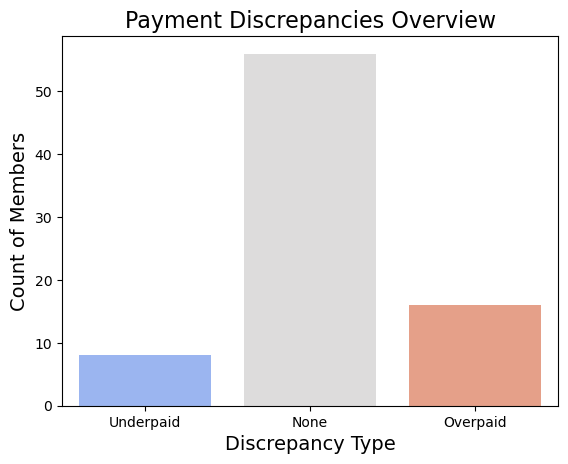

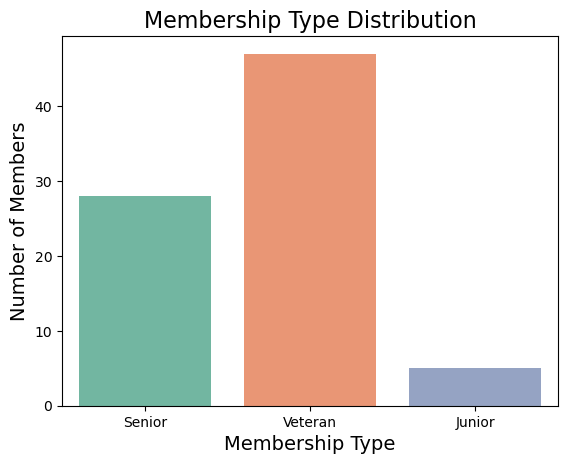

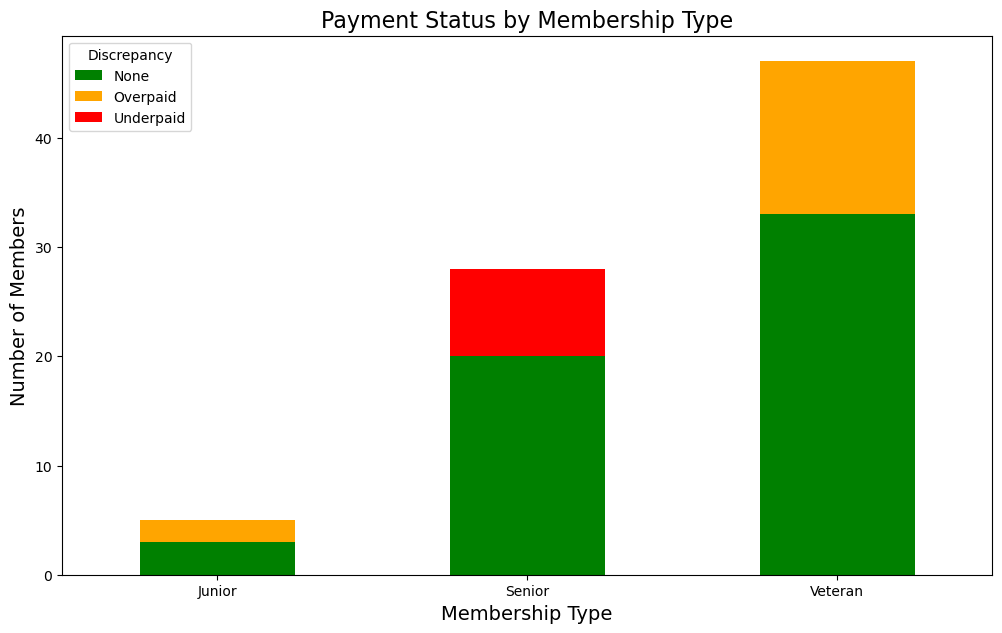

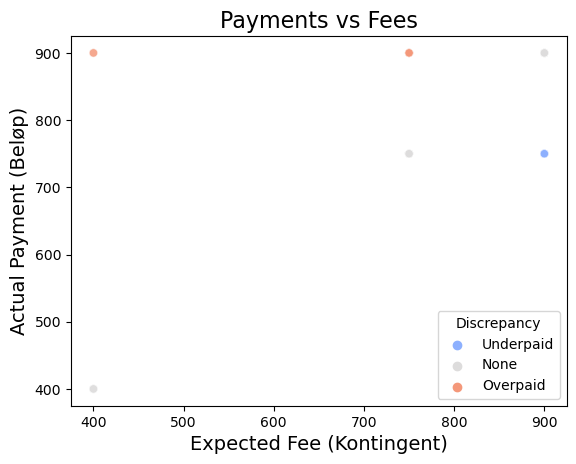

C:\Users\sivasa\AppData\Local\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sivasa\AppData\Local\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


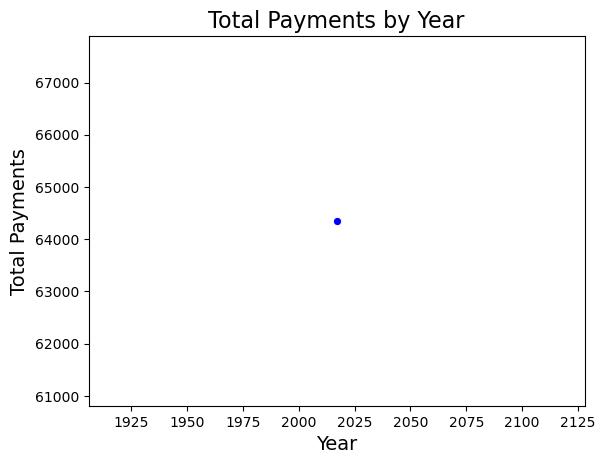

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Payment Discrepancy Distribution

sns.countplot(data=merged_data, x='Discrepancy', palette='coolwarm')
plt.title('Payment Discrepancies Overview', fontsize=16)
plt.xlabel('Discrepancy Type', fontsize=14)
plt.ylabel('Count of Members', fontsize=14)
plt.xticks(rotation=0)
plt.show()

# 2. Membership Type Distribution (Bar chart)

sns.countplot(data=merged_data, x='Medlemstype', palette='Set2')
plt.title('Membership Type Distribution', fontsize=16)
plt.xlabel('Membership Type', fontsize=14)
plt.ylabel('Number of Members', fontsize=14)
plt.xticks(rotation=0)
plt.show()

# 3. Payment Status by Member Type (Stacked Bar Chart)

payment_status_by_type = merged_data.groupby(['Medlemstype', 'Discrepancy']).size().unstack(fill_value=0)
payment_status_by_type.plot(kind='bar', stacked=True, figsize=(12, 7), color=['green', 'orange', 'red'])
plt.title('Payment Status by Membership Type', fontsize=16)
plt.xlabel('Membership Type', fontsize=14)
plt.ylabel('Number of Members', fontsize=14)
plt.xticks(rotation=0)
plt.show()

# 4. Payments vs Fees (Scatter plot)

sns.scatterplot(data=merged_data, x='Kontingent', y='Beløp', hue='Discrepancy', palette='coolwarm', alpha=0.6)
plt.title('Payments vs Fees', fontsize=16)
plt.xlabel('Expected Fee (Kontingent)', fontsize=14)
plt.ylabel('Actual Payment (Beløp)', fontsize=14)
plt.show()

# 5. Total Payments by Year (Line chart)

merged_data['Year'] = pd.to_datetime(merged_data['Periode'], format='%Y').dt.year
payment_by_year = merged_data.groupby('Year')['Beløp'].sum()

sns.lineplot(x=payment_by_year.index, y=payment_by_year.values, marker='o', color='blue')
plt.title('Total Payments by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Payments', fontsize=14)
plt.show()